In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv("balanced_dataset.csv")

In [3]:
dataset

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
0,NIP,13,57,23,33,43,3000,0,0
1,NIP,14,17,24,34,44,4000,1,1
2,NIP,22,57,32,42,52,12000,0,0
3,NIP,14,50,24,34,44,4000,1,1
4,NIP,17,91,27,37,47,7000,0,0
...,...,...,...,...,...,...,...,...,...
1091,NIP,13,70,23,33,43,3000,0,0
1092,NIP,18,69,28,38,48,8000,0,0
1093,NIP,20,72,30,40,50,10000,0,0
1094,NIP,14,23,24,34,44,4000,1,1


## Replacing the null values

In [4]:
dataset.isnull().sum()

app_name             0
response_time        0
error_rate           0
cpu_usage            0
memory_usage         0
disk_space           0
active_users         0
incident_duration    0
downtime             0
dtype: int64

## Seprating the quan and qual 

In [5]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='object'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [6]:
quan,qual=quanQual(dataset)

In [7]:
quan

['response_time',
 'error_rate',
 'cpu_usage',
 'memory_usage',
 'disk_space',
 'active_users',
 'incident_duration',
 'downtime']

In [8]:
qual

['app_name']

## Covariance

In [9]:
dataset[quan].cov()

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
response_time,13.513755,1.626267,13.513755,13.513755,13.513755,1.351376e+04,-0.031050,-0.031050
error_rate,1.626267,837.828783,1.626267,1.626267,1.626267,1.626267e+03,-0.261644,-0.261644
cpu_usage,13.513755,1.626267,13.513755,13.513755,13.513755,1.351376e+04,-0.031050,-0.031050
memory_usage,13.513755,1.626267,13.513755,13.513755,13.513755,1.351376e+04,-0.031050,-0.031050
disk_space,13.513755,1.626267,13.513755,13.513755,13.513755,1.351376e+04,-0.031050,-0.031050
active_users,13513.755291,1626.267373,13513.755291,13513.755291,13513.755291,1.351376e+07,-31.050228,-31.050228
incident_duration,-0.031050,-0.261644,-0.031050,-0.031050,-0.031050,-3.105023e+01,0.250228,0.250228
downtime,-0.031050,-0.261644,-0.031050,-0.031050,-0.031050,-3.105023e+01,0.250228,0.250228


## Correlation

In [10]:
dataset[quan].corr()

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
response_time,1.000000,0.015284,1.000000,1.000000,1.000000,1.000000,-0.016885,-0.016885
error_rate,0.015284,1.000000,0.015284,0.015284,0.015284,0.015284,-0.018070,-0.018070
cpu_usage,1.000000,0.015284,1.000000,1.000000,1.000000,1.000000,-0.016885,-0.016885
memory_usage,1.000000,0.015284,1.000000,1.000000,1.000000,1.000000,-0.016885,-0.016885
disk_space,1.000000,0.015284,1.000000,1.000000,1.000000,1.000000,-0.016885,-0.016885
active_users,1.000000,0.015284,1.000000,1.000000,1.000000,1.000000,-0.016885,-0.016885
incident_duration,-0.016885,-0.018070,-0.016885,-0.016885,-0.016885,-0.016885,1.000000,1.000000
downtime,-0.016885,-0.018070,-0.016885,-0.016885,-0.016885,-0.016885,1.000000,1.000000


## seaborn (Graphs)

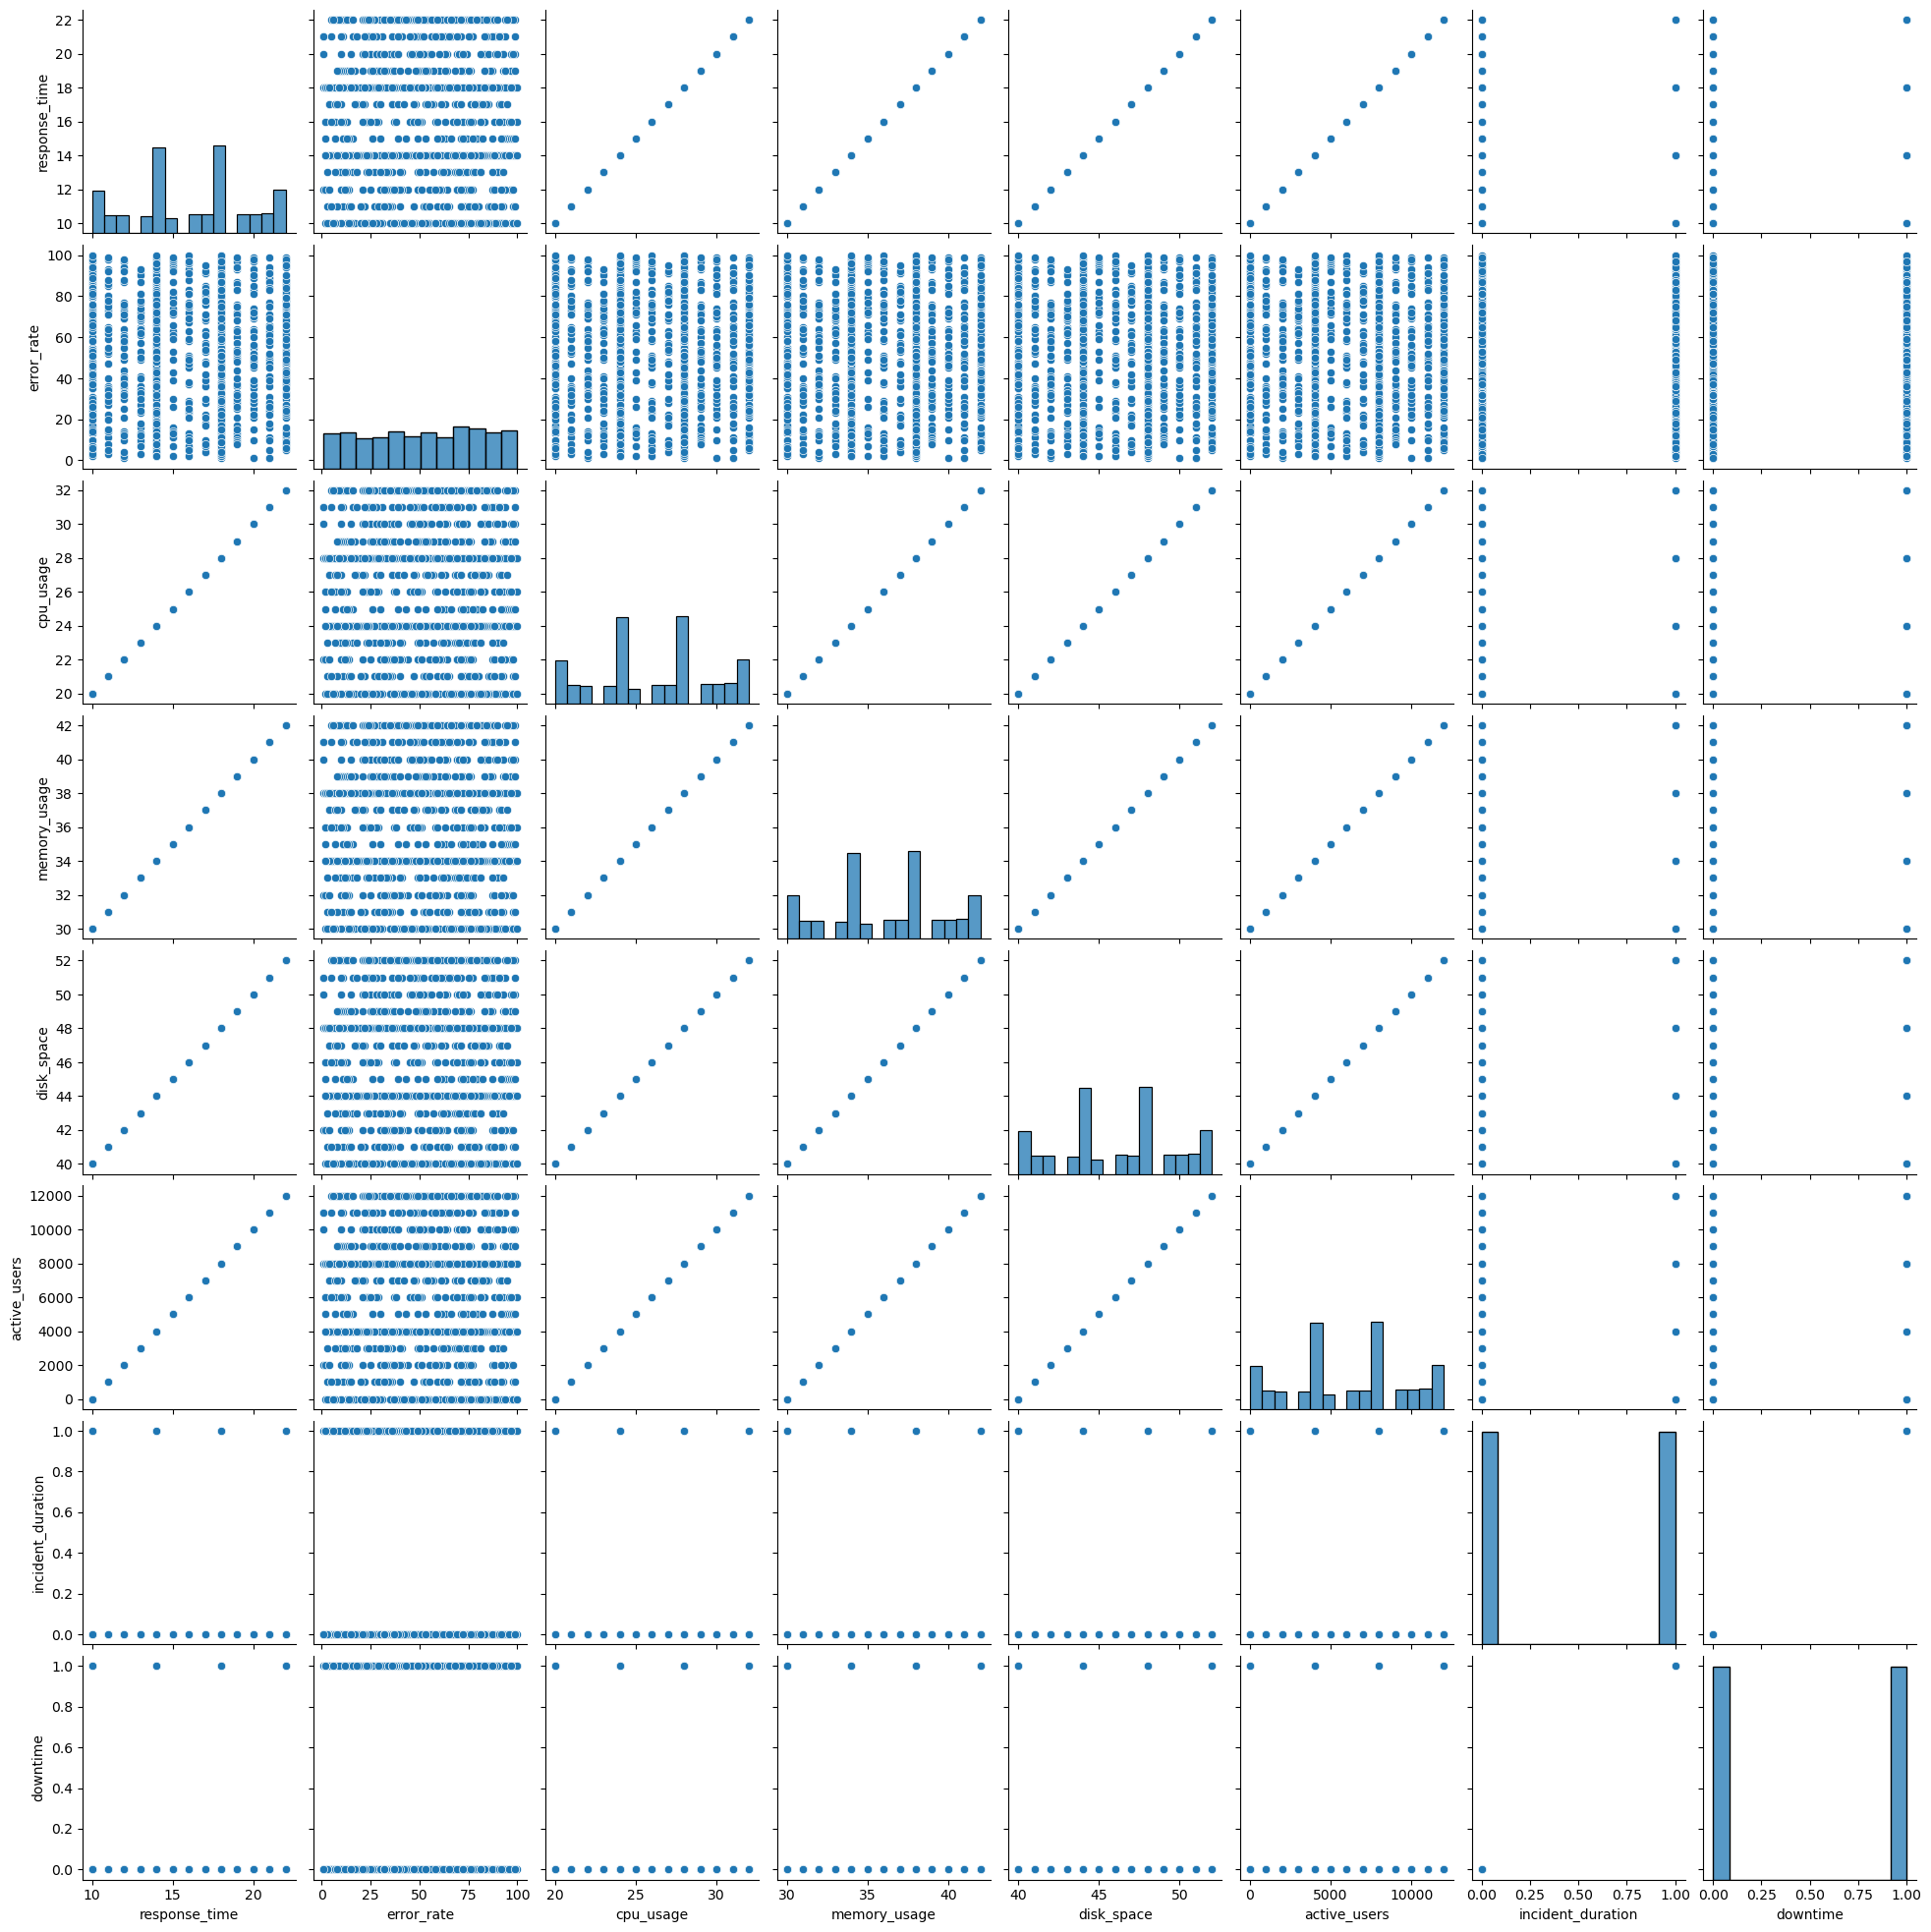

In [11]:
sns.pairplot(dataset)

## Variance_inflation_factor(VIF)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [13]:
calc_vif(dataset[quan])

C:\Anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,response_time,inf
1,error_rate,1.000551
2,cpu_usage,inf
3,memory_usage,inf
4,disk_space,inf
5,active_users,inf
6,incident_duration,inf
7,downtime,inf


In [14]:
calc_vif(dataset[['active_users','downtime']])

,variables,VIF
0,active_users,1.55931
1,downtime,1.55931


## Getting the values active_users=12000 that respect with downtime

In [15]:
dataset[dataset['active_users']==12000]['downtime']

2       0
7       0
16      1
43      1
49      1
       ..
1036    1
1054    0
1057    1
1070    1
1095    1
Name: downtime, Length: 113, dtype: int64

## Test the similarity between the downtime(1) and incident_duration(0) with respect to active_users at significance level of 5%.(Make decision using Hypothesis Testing)

In [24]:
#independent sample
#different group(0,1) but same condition(active_users)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
downtime_yes=dataset[dataset['downtime']==1]['active_users']
downtime_no=dataset[dataset['incident_duration']==0]['active_users']
ttest_ind(downtime_yes,downtime_no)

TtestResult(statistic=-0.5585719620732387, pvalue=0.5765681835007519, df=1094.0)

## Test the similarity between the downtime(1) with respect to active_users and disk_spacep at significance level of 5. (Make decision using Hypothesis Testing)g)

In [17]:
#dependent sample
#same group(downtime) but different condition(active_users, disk_space)
from scipy.stats import ttest_rel
dataset=dataset.dropna()
downtime=dataset[dataset['downtime']==1]['active_users']
downtime1=dataset[dataset['downtime']==1]['disk_space']
ttest_ind(downtime,downtime1)

TtestResult(statistic=36.426227753755605, pvalue=6.647413685660656e-191, df=1094.0)

# ANOVA one way classification

In [18]:
import scipy.stats as stats
stats.f_oneway(dataset['active_users'],dataset['downtime'])

F_onewayResult(statistic=2994.265961548879, pvalue=0.0)

# The applications are down for next 3 months

In [20]:
down_apps=dataset[dataset['downtime']==1]
down_apps

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
1,NIP,14,17,24,34,44,4000,1,1
3,NIP,14,50,24,34,44,4000,1,1
6,NIP,10,48,20,30,40,0,1,1
9,NIP,14,97,24,34,44,4000,1,1
10,NIP,18,49,28,38,48,8000,1,1
...,...,...,...,...,...,...,...,...,...
1085,NIP,18,77,28,38,48,8000,1,1
1087,NIP,18,36,28,38,48,8000,1,1
1089,NIP,18,75,28,38,48,8000,1,1
1094,NIP,14,23,24,34,44,4000,1,1


## checking the incident_duration with respect to downtime

In [21]:
incident_yes= dataset[(dataset['incident_duration'] == 1) & (dataset['downtime'] == 0)]
incident_yes

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime


In [22]:
incident_yes= dataset[(dataset['active_users'] == 0) & (dataset['downtime'] == 1)]
incident_yes


,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
6,NIP,10,48,20,30,40,0,1,1
20,NIP,10,39,20,30,40,0,1,1
29,NIP,10,2,20,30,40,0,1,1
34,NIP,10,91,20,30,40,0,1,1
40,NIP,10,7,20,30,40,0,1,1
...,...,...,...,...,...,...,...,...,...
1031,NIP,10,6,20,30,40,0,1,1
1034,NIP,10,65,20,30,40,0,1,1
1038,NIP,10,66,20,30,40,0,1,1
1040,NIP,10,51,20,30,40,0,1,1


## Normal distribution to Standard normal distribution

In [25]:
def stdNBgraph(dataset):
    # Normal Distribution is Converted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    
    values=[i for i in dataset]
    
    z_score=[((j-mean)/std) for j in values]
    
    sns.distplot(z_score,kde=True)
    
    sum(z_score)/len(z_score)
    #z_score.std()

C:\Users\91934\AppData\Local\Temp\ipykernel_5148\3747883618.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


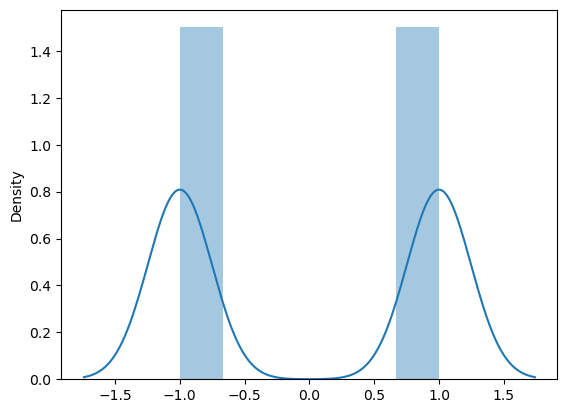

In [29]:
stdNBgraph(dataset['downtime'])